In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt


import time
start_time = time.time()

In [2]:
df2 = pd.read_csv('roboBohr1_1.csv')
df3 = pd.read_csv('roboBohr2.csv')
df4 = pd.read_csv('roboBohr2_2.csv')

In [3]:
df=pd.concat([df2, df3, df4], ignore_index=True)
print(df.shape)

(12140, 1278)


In [4]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '1267', '1268', '1269', '1270', '1271', '1272', '1273', '1274',
       'pubchem_id', 'Eat'],
      dtype='object', length=1278)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,4110,73.516695,20.602933,20.596338,20.595588,16.056751,16.056238,16.022466,16.021800,14.142769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49925,-15.312720
1,4111,73.516695,23.950783,20.757209,19.688637,18.585780,17.540328,15.145275,15.040255,14.671397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49929,-9.456850
2,4112,73.516695,23.953029,20.753943,19.686836,18.629532,17.595541,15.162607,15.039647,14.658470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49930,-7.056152
3,4113,388.023441,46.641230,46.638158,41.508833,28.781334,18.691794,13.501865,13.498868,13.364285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49935,-6.913035
4,4114,388.023441,46.643049,46.639141,41.510881,28.776254,18.690056,13.501840,13.498889,13.364049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49937,-9.323680


In [7]:
df.Eat.describe()

count    12140.000000
mean       -10.739811
std          3.611459
min        -23.245373
25%        -12.849278
50%        -10.351575
75%         -8.270909
max         -0.789513
Name: Eat, dtype: float64

# Para poner un target en clases y no tener un modelo de regresión sino convertirlo en uno de clasificación vamos a establecer clases dependiendo del valor de la energía de atomización 

In [8]:
#Creación del vector. La resolución que tiene el valor del traget es de 6 cifras decimales por ello,
#tomaremos la cantidad de puntos similares 10000000
E_at=np.linspace(df.Eat.min(), df.Eat.max(), num=10000000)
#n_class es la cantidad de clases que vamos a tener para clasificar
n_class=5  
cantidad=int(len(E_at)/(n_class))
v_min=df.Eat.min()
v_max=df.Eat.max()
#El vector de definición de rango de las clases
E_at_limits=[]
E_at_limits.append(v_min)
for i in range(n_class):
    E_at_limits.append(E_at[cantidad*(i+1)-1])
print(E_at_limits)

#Ahora vamos a crear el vector target de las clases 
n_filas=df.shape[0]
E_target=np.ones(n_filas)
for i in range(n_filas):
    inst=df.Eat[i]
    for j in range(n_class-1):
        if inst>=round(E_at_limits[j],6) and inst<round(E_at_limits[j+1],6):
            E_target[i]=int(j)
    if inst>=round(E_at_limits[n_class-1],6) and inst<round(E_at_limits[n_class],6):
        E_target[i]=int(n_class-1)

[-23.2453726199999, -18.75420256446884, -14.263030263351629, -9.77185796223442, -5.280685661117211, -0.7895133600000008]


In [9]:
#Eliminando la col Y numérica 
Y=df['Eat']
df = df.drop(['Eat'], axis = 1)

import numpy as np
import time
import matplotlib.pyplot as plt

import sklearn.datasets as skdata
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

%matplotlib inline

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df, E_target, test_size=0.5)

In [11]:
t0 = time.time() #Estos parámetros son con los pasos que tomará para convergencia por descenso de gradiente que es como funciona la regresión logística
train_samples = 200

scaler = StandardScaler() #Normalizar los datos
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Con penalización L1

In [12]:
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.01,multi_class='auto')# Modelo 
clf

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [13]:
clf.fit(x_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 13.61%
Test score with L1 penalty: 0.9097


Example run in 214.377 s


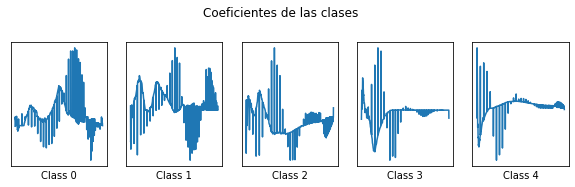

In [14]:
coef = clf.coef_.copy()
n_cols=df.shape[1]
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(5):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.plot(range(n_cols),coef[i])
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Coeficientes de las clases')
plt.savefig('coeficientes.png')
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
# Plot non-normalized confusion matrixplt.show()

## Parece que no hay cambio en el peso de los beta respecto a la penalización

# Ahora probamos penalización L2

In [15]:
clf1 = LogisticRegression(C=50. / train_samples, penalty='l2', solver='saga', tol=0.01,multi_class='auto')# Modelo 
clf1

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [16]:
clf1.fit(x_train, y_train)
sparsity = np.mean(clf1.coef_ == 0) * 100
score = clf1.score(x_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Sparsity with L2 penalty: 0.00%
Test score with L2 penalty: 0.9117


Example run in 369.457 s


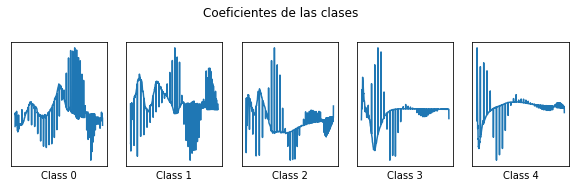

In [17]:
coef1 = clf1.coef_.copy()
n_cols=df.shape[1]
plt.figure(figsize=(10, 5))
scale = np.abs(coef1).max()
for i in range(5):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.plot(range(n_cols),coef1[i])
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Coeficientes de las clases')
plt.savefig('coeficientesl2.png')
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
# Plot non-normalized confusion matrixplt.show()

## Comparando los dos valores F1 para l1 y l2 con el mismo C

In [18]:
from sklearn.metrics import f1_score

f1_l1=f1_score(y_test, clf.predict(x_test), average='micro')
f1_l2=f1_score(y_test, clf1.predict(x_test), average='micro')
print("el valor de F1 para penalización l1 es "+ str(f1_l1))
print("el valor de F1 para penalización l1 es "+ str(f1_l2))

el valor de F1 para penalización l1 es 0.9097199341021417
el valor de F1 para penalización l1 es 0.9116968698517298


# Variando C desde 10^-5 hasta 10^2

In [22]:
n_puntos=20
C=np.logspace(-5,2,n_puntos)
F1_l1=[]
F1_l2=[]

def modelo(c,l):
    clf = LogisticRegression(C=c, penalty= l , solver='saga', tol=0.01, multi_class='auto')# Modelo 
    return clf


for i in range(n_puntos):
    Ci=C[i]
    
    clfa = modelo(Ci,'l1')
    clfb = modelo(Ci,'l2')
    
    clfa.fit(x_train, y_train)
    clfb.fit(x_train, y_train)
    
    f1_l1=f1_score(y_test, clfa.predict(x_test), average='micro')
    f1_l2=f1_score(y_test, clfb.predict(x_test), average='micro')
    
    F1_l1.append(f1_l1)
    F1_l2.append(f1_l2)



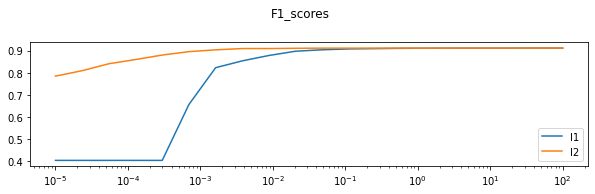

In [26]:

fig=plt.figure(figsize=(10, 5))   

ax = fig.add_subplot(2, 1, 1)
ax.plot(C,F1_l1,label='l1')
ax.plot(C,F1_l2,label='l2')
ax.set_xscale('log')
plt.suptitle('F1_scores')
plt.savefig('F1_scores')
plt.legend()